## Method
- Select prediction for Candelaria localidad
- Plot risk intensity map prediction vs. real event occurrence.
- Check hit rate on plot.

## Hypothesis:
Hit rates close to 1 are obtained in scenarios with a reduced number of cases (ground truth) and by the nature of the performance measure (hit rate).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from services.prediction_experiment import PredictionExperiment

Failed to import `rtree`.
Failed to import `rtree`.


In [2]:
def get_value(row,c):
    return row['Hit-rates'][c]

## SIEDCO

In [5]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/deduplicate_siedco_09062020.csv'
siedco_info = {'name':'SIEDCO','path':csv_path}

In [6]:
train_dates = {'initial':'2018-03-01','final':'2018-09-30'}
validation_dates = {'initial':'2018-10-01','final':'2018-10-07'}
model = "SEPPexp"
metrics = ''
aggregation = ''

/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (32,44) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 30, 0, 0)}
current_validation_date 2018-10-01 00:00:00
125
omega: 0.033939850741917243, theta: 0.01564932949684398
train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 1, 0, 0)}
current_validation_date 2018-10-02 00:00:00
125


../services/process_data.py:67: UserWarning: Empty filter result, check dates. Initial date: 2018-10-01, final date: 2018-10-02
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


omega: 0.033939850741917243, theta: 0.01564932949684398
train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 2, 0, 0)}
current_validation_date 2018-10-03 00:00:00
125


../services/process_data.py:67: UserWarning: Empty filter result, check dates. Initial date: 2018-10-02, final date: 2018-10-03
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


omega: 0.033939850741917243, theta: 0.01564932949684398
risk intensity sum:  0.000403725216175294
risk intensity sum:  0.000403725216175294
risk intensity sum:  0.000403725216175294
risk intensity sum:  0.000403725216175294
train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 3, 0, 0)}
current_validation_date 2018-10-04 00:00:00
126
omega: 0.03393526931511674, theta: 0.015527433255239604
train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 4, 0, 0)}
current_validation_date 2018-10-05 00:00:00
126


../services/process_data.py:67: UserWarning: Empty filter result, check dates. Initial date: 2018-10-04, final date: 2018-10-05
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


omega: 0.03393526931511674, theta: 0.015527433255239604
train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 5, 0, 0)}
current_validation_date 2018-10-06 00:00:00
126


../services/process_data.py:67: UserWarning: Empty filter result, check dates. Initial date: 2018-10-05, final date: 2018-10-06
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


omega: 0.03393526931511674, theta: 0.015527433255239604
train_subset_dates {'initial': datetime.datetime(2018, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 6, 0, 0)}
current_validation_date 2018-10-07 00:00:00
126


../services/process_data.py:67: UserWarning: Empty filter result, check dates. Initial date: 2018-10-06, final date: 2018-10-07
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


omega: 0.03393526931511674, theta: 0.015527433255239604


../services/process_data.py:67: UserWarning: Empty filter result, check dates. Initial date: 2018-10-07, final date: 2018-10-08
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


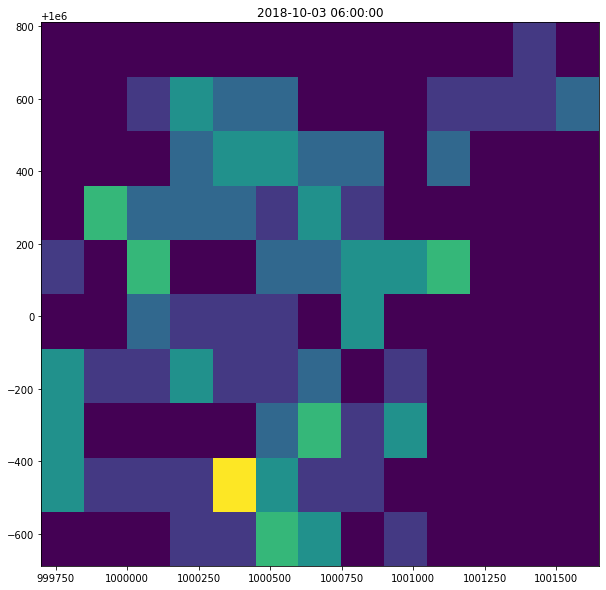

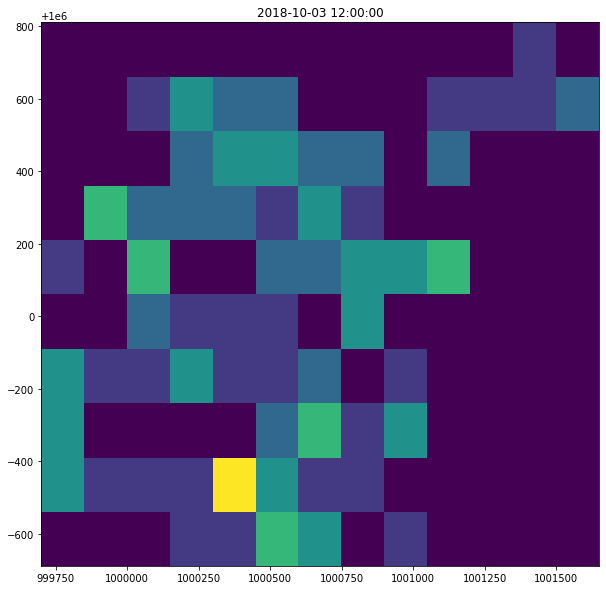

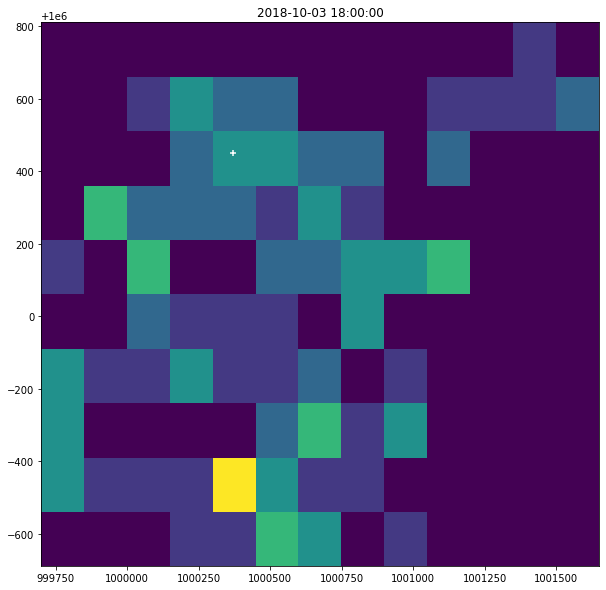

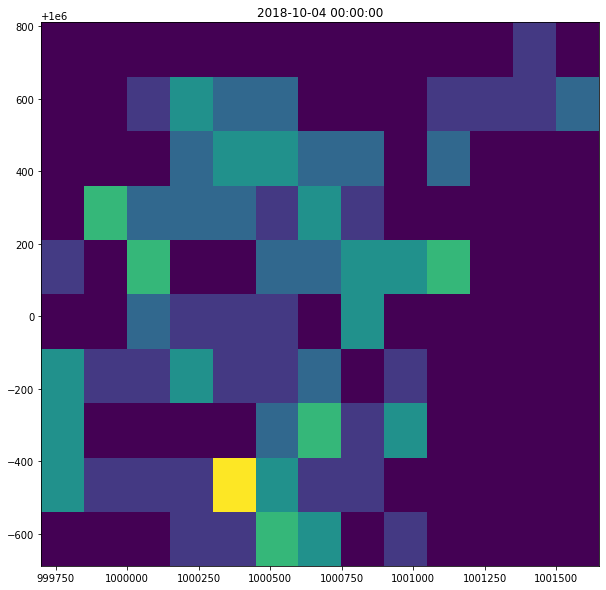

In [7]:
filter_localidad = {'field':'LOCALIDAD','value':'CANDELARIA'}
localidad_experiment = PredictionExperiment(dataset_info=siedco_info, custom_filter=filter_localidad,train_dates=train_dates, validation_dates=validation_dates, model=model,metrics='',aggregation_data='')
accuracy_array = localidad_experiment.run_ncv_experiment(time_unit='',grid_size=150, outer_iterations='')

In [8]:
flat_list = [item for sublist in accuracy_array for item in sublist]
df_result = pd.DataFrame(flat_list, columns =['Prediction-time', 'Hit-rates'])
coverages = [2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]
for c in coverages:
    column = 'coverage_'+str(c)
    df_result[column] = df_result.apply(lambda row: get_value(row,c), axis=1)


In [9]:
df_siedco = df_result.copy()
#delete datetimes where no crimes were reported (0 crimes on ground truth -> hit-rate = -1)
df_siedco = df_siedco[df_siedco['coverage_2.0']!= -1]
print(df_siedco.mean())

coverage_2.0     0.0
coverage_4.0     0.0
coverage_6.0     0.0
coverage_8.0     1.0
coverage_10.0    1.0
coverage_12.0    1.0
coverage_14.0    1.0
coverage_16.0    1.0
coverage_18.0    1.0
coverage_20.0    1.0
dtype: float64
